# Text Classification

### About Data
<pre>
The data contains 20 classes document that we have to classify.
- <b>Number of datapoints</b> : 18712.
- <b>Number of class</b> : 20.
- <b>Data format</b> : Txt File.
            
            documents/
                      alt.atheism_49960.txt
                      alt.atheism_51119.txt
                      ...
                     
             where <b> alt.atheism</b> indicates the class name.

</pre>

### Bussiness Constrain
<pre>

- To develop a model that will help to classify the format to 20 classes provided.
- Low latency.
- Accuracy can be taken as performance matrix as its multiclass classification and data are nearly balance.

</pre>

### Imports

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import re
from tqdm import tqdm
from datetime import datetime
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
import keras
from tensorflow.keras.utils import to_categorical

In [2]:
### count plot of all the class labels.
dir_path = "documents/"
classes = {}
for file in os.listdir(dir_path):
    class_name = file.split("_")
    if class_name[0] in classes:
        classes[class_name[0]] +=1
    else:
        classes[class_name[0]]=0
    

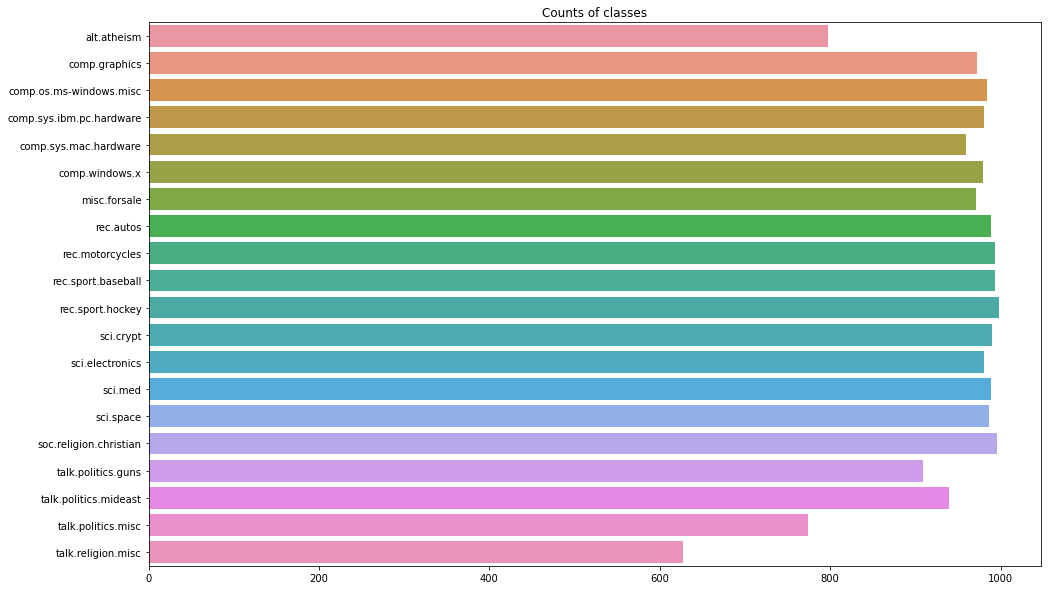

In [3]:
x = list(classes.keys())
y = list(classes.values())
plt.figure(figsize=(16,10))
plt.title("Counts of classes")
sns.barplot(x = y,y = x)
plt.show()

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Processing
<pre>

<font color="Red"><b>Point of Action</b></font>
- Since we are classifying the data that are mail or article so every thing has head,body.So task can be divided into 2.
- For head we use subject and mail.
- For body we preprocess everything and save all.
<br>
<font color="Blue"><b>TEXT PREPROCESS TECHNIQUE</b></font>

1. Get mail from the Text filter out all the punctuation, @ from and front part before @. as it usually contain name.
2. Get part that contain only Subject.
3. For Body filter out : 
    - Punctutaion.
    - Name of person.
    - Number if any.
    - Lower down the case.
    - Replace shortcut with its full form.
    - Remove space.
    - Remove newline.
    - Remove tabs if any.
    - Remove words less than or equal to 2.
    - Remove Stopwords - <font color="Brown">Using NLTK for stopword</font>.
    - Remove words greater than 20.
</pre>


### For emails

In [87]:
import re
start_time = datetime.now()
mails = []
for i in tqdm(os.listdir(dir_path)):
    processed_mail = ""
    with open(dir_path+"/" + i,"r") as f:
        text = f.read()
        email = re.findall('[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+',text)
        # since first word in email are name so not so use full and .com .uk in mail are also not use ful so getting only the 
        # domain name for the email
        for mail in email:
            text = text.replace(mail," ")
            mail = mail.split("@")
            mail = mail[1].split(".")
            for m in mail:
                if len(m)>2 and m != "com":
                    m = m.lower()
                    processed_mail += m + " " 
                    
        mails.append(processed_mail.strip())
        
   
    # writting to the file
    with open(dir_path+"/" + i,"w") as f:
        f.write(text)

print("Done")
print("Time taken : ", datetime.now()-start_time)

100%|██████████| 18828/18828 [00:16<00:00, 1174.81it/s]

Done
Time taken :  0:00:16.054268


In [197]:
mails[0]

'mantis netcom mantis'

### For Subjects

In [194]:
# Reading the after processing for mails
with open(dir_path+"/" + "alt.atheism_51060.txt","r") as f:  
    text = f.readlines()
   
subjects = []
one = []
to_remove_sub = []
for i in tqdm(os.listdir(dir_path)):
    one = []
    without_sub = ""
    with open(dir_path+"/" + i,"r") as f:  
        text = f.readlines()
        for t in text:
           
            orgi_t = t
            t = t.lower() 
            if t.startswith("subject:"):
         
                to_remove_sub.append(orgi_t)
                t = re.sub("subject:","",t) # removing subject
                t = re.sub("re:","",t) # remoing re  
                t = re.sub(":","",t) # removing :
                t = t.replace("′", "'").replace("’", "'")\
               .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
               .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
               .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
               .replace("he's", "he is").replace("she's", "she is")\
               .replace("'ll", " will")  # replacing values
                t = re.sub(r'[^\w\s]', ' ', t) # removing punctuation
                t = re.sub(r"[^a-zA-Z0-9]+"," ",t) # removing special charater 
                t = re.sub("\n"," ",t) # removing new line
                t = re.sub("\t"," ",t)  # removing tabs  
                t = re.sub("\S*\d\S*", " ", t).strip() # removing numbers
                if t not in one:
                    one.append(t)
                    
            else:
                # also remove the line from, to , write to as it conatin mail which is already extraacted
                if not t.startswith("from:") and (not t.startswith("write to:")) and t!="\n":
                   
                    without_sub  += orgi_t
                
                             
        t = " ".join(one).strip()
        subjects.append(t)
        
    with open(dir_path+"/" + i,"w") as f: 
        f.write(without_sub)
#     print(without_sub)
   
#     break
   
    
                

100%|██████████| 18828/18828 [00:15<00:00, 1246.70it/s]


In [196]:
subjects[1]

'alt atheism faq introduction to atheism'

In [223]:
x = "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)"
re.sub("[\(\[].*?[\)\]]", "", x)

'AAIC-The course that gets you HIRED'

In [230]:
x = "their is the <life is hard sdfksdkflskdlgskldgkslkglskdg> [ok is ha] (ofkdafl)"
re.sub("[\<\(\[].*?[\)\]\>]", "", x).strip()



'their is the'

In [232]:
blah = "word word: monty py: thon"
re.sub(r'\w+:\s?','',blah)

'word monty thon'

In [234]:
t = "_kjhkjhkjh_"
re.sub(r"[^a-zA-Z0-9]+"," ",t)

' kjhkjhkjh '

### Whole text preprocess

In [286]:
stopword = stopwords.words('english')
stopword = set(stopword)
final_text = []
def preprocess(dir_path):
    
    for i in tqdm(os.listdir(dir_path)):
        processed_text = ""
        with open(dir_path+"/" + i,"r") as f:
            #reading the file
            text = f.read()
                     
            # lower the text
            text =text.lower()
            # remove all the thing inside bracket
            text = re.sub("[\<\(\[].*?[\)\]\>]", "", text).strip()
            # change shortform 
            text = text.replace("′", "'").replace("’", "'")\
                       .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                       .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                       .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                       .replace("he's", "he is").replace("she's", "she is")\
                       .replace("'ll", " will") 
            # remove special character  and punctuation
            text = re.sub(r'[^\w\s]', ' ', text) 
            text = re.sub(r"[^a-zA-Z0-9]+"," ",text) 
            # remove new line, tabs, \ , -
            text = re.sub("\n"," ",text)
            text = re.sub("\t"," ",text) 
            text = re.sub("-"," ",text)
            # reject everything that ends with : as they are subjects 
            text = re.sub(r'\w+:\s?','',text)
            # remove numbers
            text = re.sub("\S*\d\S*", " ", text)
            # remove multiple spaces
            text = re.sub('\\s+', ' ', text)
                 
            # remove word that are less than one 
            for word in text.split(" "):
                if (len(word)>2) and (word not in stopword) and (len(word)<=20):
                    
                    processed_text +=word + " "
                
        final_text.append(processed_text.strip())  
        

        
        
    

            

    
    
    

In [287]:
preprocess(dir_path)


100%|██████████| 18828/18828 [00:10<00:00, 1764.97it/s]


### Combining subjects, emails and text together

In [307]:
data_frame = pd.DataFrame()
data_frame["subject"] = subjects
data_frame["mails"] = mails
data_frame["processed_text"] = final_text
# print(final_text),len(subjects),len(mails)
data_frame.head()
## saving the dataframe
data_frame.to_csv("final_data.csv",index=False)


In [16]:
df = pd.read_csv("final_data.csv")
df.head()

,subject,mails,processed_text
0,alt atheism faq atheist resources,mantis netcom mantis,archive name atheism resources alt atheism arc...
1,alt atheism faq introduction to atheism,mantis mantis mantis,archive name atheism introduction alt atheism ...
2,gospel dating,dbstu1 tu-bs mimsy umd edu umd edu,article writes well john quite different neces...
3,university violating separation of church state,mantis kepler unh edu,writes recently ras ordered none resisted care...
4,soc motss et al princeton axes matching funds ...,watson ibm com harder ccr-p ida org harder ccr...,article writes however hate economic terrorism...


In [17]:
# combining the subject , mail and processd_text
df["txt_sub_emails"] = df["subject"] + " " + df["mails"] + " " + df["processed_text"]
# adding class to the database
data_path = "documents"
classes = []
for doc in os.listdir(data_path):
    
    class_name = doc.split("_")[0]
    classes.append(class_name)

df["classes"] = classes

In [18]:
df.isnull().any()

subject            True
mails              True
processed_text     True
txt_sub_emails     True
classes           False
dtype: bool

In [19]:
df.dropna(inplace=True,)


In [20]:
df.isnull().sum()

subject           0
mails             0
processed_text    0
txt_sub_emails    0
classes           0
dtype: int64

In [21]:
#

In [22]:
### spliting the dataset
from sklearn.model_selection import train_test_split

x_data = df["txt_sub_emails"]
y_data = df["classes"]

train_x , val_x , train_y, val_y = train_test_split(x_data,y_data,train_size=0.75,shuffle=True,stratify=y_data)
print("Total data : ",df.shape[0])
print("No of train data : ", train_x.shape[0])
print("No of val data : ", val_x.shape[0])

Total data :  18712
No of train data :  14034
No of val data :  4678


In [33]:
train_x.shape,train_y.shape


245      the inimitable rushdie an anecdote about islam...
17592    clinton press briefing by george stephanopoulo...
14852    some questions from a new christian empros emp...
17054    freedom in u s a surya ucla edu brown edu virg...
43       political atheists cwru edu gap caltech edu cc...
                               ...                        
11008    secret algorithm clipper chip and crypto key e...
13379    a good place for back surgery panix cbnewsg at...
9570     bob vesterman s plan to generate fan interest ...
13994    keeping spacecraft on after funding cuts acces...
645      alt atheism faq constructing a logical argumen...
Name: txt_sub_emails, Length: 14034, dtype: object

In [24]:
def count_min_max_sent_word(dataframe):
    min_sent = 1000000
    max_sent = -100000
    for sent in dataframe:
        sent = str(sent)
        min_sent = min(min_sent,len(sent))
        max_sent = max(max_sent,len(sent))
        if len(sent)==3:
            print(sent)
            break
    
            
        
    print("Maximum : ", min_sent)
    print("Maximum : ", max_sent)
        
count_min_max_sent_word(x_data)

Maximum :  17
Maximum :  44659


#### Char level tokenizing


In [34]:
from datetime import datetime
start_time = datetime.now()
df_char_train = []
for i in tqdm(train_x):
    row_char = []
    for char in i:
        row_char.append(char)
    df_char_train.append(row_char)

## validation data
df_char_val = []
for i in tqdm(val_x):
    row_char = []
    for char in i:
        row_char.append(char)
    df_char_val.append(row_char)
    


    
print("Total time taken : ", datetime.now()-start_time)
print("Oringinal train size: ",train_x.shape[0],"After char level : ", len(df_char_train))
print("Original val size : ",val_x.shape[0],"After char level : ", len(df_char_val))
    

100%|██████████| 4678/4678 [00:00<00:00, 12815.63it/s]

Total time taken :  0:00:01.609828
Oringinal train size:  14034 After char level :  14034
Original val size :  4678 After char level :  4678


### Tokenizing for word level incoding

In [ ]:
def make_string(x):
    return str(x)
df["txt_sub_emails"] = df["txt_sub_emails"].apply(make_string)
x_data = np.array(df["txt_sub_emails"])
tokenizer_data = Tokenizer(num_words=20000)
tokenizer_data.fit_on_texts(x_data)

# for the train data
text_sequences_train = tokenizer_data.texts_to_sequences(train_x)
# for the valalidation data
text_sequences_val = tokenizer_data.texts_to_sequences(val_x)

### Tokenizing for char-level encoding

In [43]:
tokenizer_data = Tokenizer(num_words=20000)
tokenizer_data.fit_on_texts(df_char_train)

# for the train data
text_sequences_train_char = tokenizer_data.texts_to_sequences(df_char_train)
# for the valalidation data
text_sequences_val_char = tokenizer_data.texts_to_sequences(df_char_val)

### Creating the token for unique category

In [41]:
from sklearn.preprocessing import OneHotEncoder

## ---------------- for train data-------------------------
y_train = train_y.values
##------------------------changing into 2 dim ----------------
y_train = y_train.reshape((y_train.shape[0],1))
## ------------ for validation data---------------
y_val = val_y.values
## ------------ changing into 2 dim
y_val = y_val.reshape((y_val.shape[0],1))
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit(y_train.reshape((y_train.shape[0],1)))
y_train = onehot.transform(y_train) # for train data
y_val = onehot.transform(y_val) # for validation data

In [47]:
print("The y_train  shape : ", y_train.shape[0])
print("The val shape  shape : ",y_val.shape[0])

assert y_train.shape[0]==len(text_sequences_train_char) and y_val.shape[0]== len(text_sequences_val_char)

The y_train  shape :  14034
The val shape  shape :  4678


In [48]:
max_review_length = 100
X_train = sequence.pad_sequences(text_sequences_train_char, maxlen=max_review_length)
X_val = sequence.pad_sequences(text_sequences_val_char, maxlen=max_review_length)

print("After padding shape of train data : ",X_train.shape)
print("")
print("The data in vector : ")


After padding shape of train data :  (14034, 100)

The data in vector : 


#### Word Embedding Glove Vector

In [90]:
f = open('glove.6B.100d.txt',encoding="utf8")
embeddings_index = dict()

for line in f:
    
    values = line.split()
    word = values[0]
    coefs = values[1:]
    embeddings_index[word] = coefs


#### Char Embedding Glov Vector

In [74]:
f = open("glove_char_300d.txt",encoding="utf8")
embeddings_index_char = dict()

for line in f:
    values = line.split()
    char = values[0]
    vectors = values[1:]
    assert len(vectors) == 300
    embeddings_index_char[char] = vectors
    
# print(embeddings_index_char.keys) 
print(tokenizer_data.word_index)

{' ': 1, 'e': 2, 'a': 3, 'i': 4, 's': 5, 't': 6, 'n': 7, 'r': 8, 'o': 9, 'l': 10, 'c': 11, 'd': 12, 'u': 13, 'm': 14, 'p': 15, 'g': 16, 'h': 17, 'y': 18, 'w': 19, 'b': 20, 'f': 21, 'v': 22, 'k': 23, 'x': 24, 'j': 25, 'z': 26, 'q': 27, '1': 28, '-': 29, '2': 30, '0': 31, '3': 32, '6': 33, '4': 34, '5': 35, '8': 36, '7': 37, '9': 38}


### Word Level embedding`

In [93]:
# embedding_matrix
val =  len(tokenizer_data.word_index)
print("Total token for the data : ",val)

Total token for the data :  94253


In [94]:
vocab_size = len(tokenizer_data.word_index)
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer_data.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [96]:
print("The shape of embedding matrix is :",embedding_matrix.shape)


The shape of embedding matrix is : (94253, 100)


array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
         7064,  6316,     1,  6990,  7064,  6316,     1,  5690,  1474,
          370,  2760,   107,  1827,    32,    58,  5690,  1474, 17937,
          236,  1319,  1267,     2,     7,   503,    27,    63,   524,
           41,   174,   524, 12465, 17937,   347,  6316,  5769,  2690,
          174]])

### Char level embedding

In [78]:
vocab_size = len(tokenizer_data.word_index)
embedding_matrix = np.zeros((vocab_size+1, 300))
for word, i in tokenizer_data.word_index.items():
    embedding_vector = embeddings_index_char.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [80]:
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [282]:
## creating the model
from tensorflow.keras.models import Model, load_model,Sequential
import tensorflow as tf

tf.keras.backend.clear_session()
      
x_input= keras.layers.Input((100,)) 
x_inpu = keras.layers.Embedding(val,100,input_length=100,weights=[embedding_matrix],trainable=False)(x_input)
conv1  = keras.layers.Conv1D(16,7,activation="relu",name="conv1")(x_inpu)
conv2 = keras.layers.Conv1D(16,7,activation="relu",name="conv2")(x_inpu)
conv3 = keras.layers.Conv1D(16,7,activation="relu",name= "conv3")(x_inpu)
merger = tf.keras.layers.Concatenate(axis=-1)([conv1, conv2,conv3])
x_p = keras.layers.MaxPool1D()(merger)
conv1  = keras.layers.Conv1D(16,7,activation="relu",name="aftepollconv1")(x_p)
conv2 = keras.layers.Conv1D(16,7,activation="relu",name="afterpollconv2")(x_p)
conv3 = keras.layers.Conv1D(16,7,activation="relu",name="afterpollconv3")(x_p)
merger = tf.keras.layers.Concatenate(axis=-1)([conv1, conv2,conv3])
x_p = keras.layers.MaxPool1D()(merger)
conv1  = keras.layers.Conv1D(16,7,activation="relu",name="aftepollconv11")(x_p)
x = keras.layers.Flatten()(conv1)
x = keras.layers.Dropout(0.5)(x)
# x = keras.layers.Dense(256,activation="relu")(x)
# x = keras.layers.Dense(128,activation="relu")(x)
# x = keras.layers.Dense(64,activation="relu")(x)
x = keras.layers.Dense(20,activation="relu")(x)
output = keras.layers.Dense(20,activation="softmax")(x)

model = Model(inputs=x_input,outputs=output)

model.summary()
# model.plot()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     9425300     ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv1D)                 (None, 94, 16)       11216       ['embedding[0][0]']              
                                                                                                  
 conv2 (Conv1D)                 (None, 94, 16)       11216       ['embedding[0][0]']              
                                                                                              

### Model parameter

In [285]:
epoch = 10
batch_size = 64
# optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=[X_val,y_val],batch_size=batch_size,epochs=epoch)

Epoch 1/10
220/220 [==============================] - 11s 49ms/step - loss: 1.3753 - accuracy: 0.5239 - val_loss: 1.3625 - val_accuracy: 0.5329
Epoch 2/10
220/220 [==============================] - 11s 48ms/step - loss: 1.3435 - accuracy: 0.5358 - val_loss: 1.3349 - val_accuracy: 0.5385
Epoch 3/10
220/220 [==============================] - 11s 49ms/step - loss: 1.3267 - accuracy: 0.5385 - val_loss: 1.3189 - val_accuracy: 0.5455
Epoch 4/10
220/220 [==============================] - 11s 48ms/step - loss: 1.2949 - accuracy: 0.5499 - val_loss: 1.3024 - val_accuracy: 0.5541
Epoch 5/10
220/220 [==============================] - 11s 50ms/step - loss: 1.2686 - accuracy: 0.5532 - val_loss: 1.2846 - val_accuracy: 0.5599
Epoch 6/10
220/220 [==============================] - 10s 47ms/step - loss: 1.2479 - accuracy: 0.5658 - val_loss: 1.2754 - val_accuracy: 0.5652
Epoch 7/10
220/220 [==============================] - 10s 47ms/step - loss: 1.2360 - accuracy: 0.5659 - val_loss: 1.2807 - val_accuracy:

In [286]:
## We are heating the plateau so reducing the learnig rate

epoch = 10
batch_size = 64

# optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=[X_val,y_val],batch_size=batch_size,epochs=epoch)

Epoch 1/10
220/220 [==============================] - 11s 46ms/step - loss: 1.1485 - accuracy: 0.6010 - val_loss: 1.2274 - val_accuracy: 0.5782
Epoch 2/10
220/220 [==============================] - 10s 46ms/step - loss: 1.1470 - accuracy: 0.5958 - val_loss: 1.2243 - val_accuracy: 0.5825
Epoch 3/10
220/220 [==============================] - 11s 50ms/step - loss: 1.1453 - accuracy: 0.5968 - val_loss: 1.2245 - val_accuracy: 0.5836
Epoch 4/10
220/220 [==============================] - 11s 50ms/step - loss: 1.1388 - accuracy: 0.6020 - val_loss: 1.2220 - val_accuracy: 0.5838
Epoch 5/10
220/220 [==============================] - 11s 49ms/step - loss: 1.1351 - accuracy: 0.6005 - val_loss: 1.2231 - val_accuracy: 0.5840
Epoch 6/10
220/220 [==============================] - 11s 48ms/step - loss: 1.1388 - accuracy: 0.6018 - val_loss: 1.2209 - val_accuracy: 0.5851
Epoch 7/10
220/220 [==============================] - 11s 49ms/step - loss: 1.1332 - accuracy: 0.6070 - val_loss: 1.2195 - val_accuracy:

In [288]:
pred = model.predict(X_val[89].reshape(1,100))

In [289]:
np.argmax(pred),np.argmax(y_val[89])

(18, 18)

### Observation 

<pre>
- Model was trained with learning rate of __0.0001 and 0.001__.

- When the learning rate was 0.001 model tends to over fit after certain time.

- The __filter size__ was change from __3 to 7__ to reduce the __parameter__ of the model.

- Embedding layers use is of glob embedding which seem to perform good.

- After we kept hitting the __Plateau__ train was terminated and accuracy was calculated.

- The overall accuracy was found to be around __58 Percent__.

- <font color="Blue" size="4"><b>To Remember</b></font>

1. The filter in conv1d can act as n-grams.
2. The inital size of the metrix should be one dimension to pass through embedding layers which give the dimesion of word vector.

</pre>

### Model-2 : Using 1D convolutions with character embedding

In [103]:
## creating the model
from tensorflow.keras.models import Model, load_model,Sequential
import tensorflow as tf

tf.keras.backend.clear_session()

inputs = tf.keras.layers.Input((100,))
embd_inputs = tf.keras.layers.Embedding(39,300,weights=[embedding_matrix],trainable=False)(inputs)
x = tf.keras.layers.Conv1D(16,7,activation="relu",name="first_conv")(embd_inputs)
x = tf.keras.layers.Conv1D(16,7,activation="relu",name="Second_conv")(x)
x = tf.keras.layers.MaxPool1D()(x)
x = tf.keras.layers.Conv1D(16,7,activation="relu",name="First_conv_1")(x)
x = tf.keras.layers.Conv1D(16,7,activation="relu",name="second_conv_1")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(32,activation="relu")(x)
outputs = tf.keras.layers.Dense(20,activation="softmax",name="output")(x)

model = Model(inputs=inputs,outputs=outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 300)          11700     
                                                                 
 first_conv (Conv1D)         (None, 94, 16)            33616     
                                                                 
 Second_conv (Conv1D)        (None, 88, 16)            1808      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 44, 16)           0         
 )                                                               
                                                                 
 First_conv_1 (Conv1D)       (None, 38, 16)            1808      
                                                             

In [98]:
## Model trained with the dense layers of 64  and filter size of 7
epoch = 50
batch_size = 64
# optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=[X_val,y_val],batch_size=batch_size,epochs=epoch)

Epoch 1/50
220/220 [==============================] - 11s 44ms/step - loss: 2.9953 - accuracy: 0.0495 - val_loss: 2.9925 - val_accuracy: 0.0519
Epoch 2/50
220/220 [==============================] - 13s 60ms/step - loss: 2.9922 - accuracy: 0.0540 - val_loss: 2.9915 - val_accuracy: 0.0556
Epoch 3/50
220/220 [==============================] - 10s 47ms/step - loss: 2.9903 - accuracy: 0.0586 - val_loss: 2.9881 - val_accuracy: 0.0733
Epoch 4/50
220/220 [==============================] - 10s 45ms/step - loss: 2.9825 - accuracy: 0.0731 - val_loss: 2.9772 - val_accuracy: 0.0821
Epoch 5/50
220/220 [==============================] - 11s 49ms/step - loss: 2.9661 - accuracy: 0.0872 - val_loss: 2.9573 - val_accuracy: 0.0941
Epoch 6/50
220/220 [==============================] - 11s 50ms/step - loss: 2.9443 - accuracy: 0.1014 - val_loss: 2.9392 - val_accuracy: 0.1056
Epoch 7/50
220/220 [==============================] - 15s 70ms/step - loss: 2.9221 - accuracy: 0.1105 - val_loss: 2.9238 - val_accuracy:

In [99]:
# since model is not converging fast increasing the learning rate 
# This model was trained with the dense layers of 64 .
epoch = 10
batch_size = 64
# optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=[X_val,y_val],batch_size=batch_size,epochs=epoch)

Epoch 1/10
220/220 [==============================] - 11s 44ms/step - loss: 2.5759 - accuracy: 0.2392 - val_loss: 2.7358 - val_accuracy: 0.2054
Epoch 2/10
220/220 [==============================] - 14s 64ms/step - loss: 2.5296 - accuracy: 0.2482 - val_loss: 2.7395 - val_accuracy: 0.2048
Epoch 3/10
220/220 [==============================] - 14s 61ms/step - loss: 2.4834 - accuracy: 0.2624 - val_loss: 2.7309 - val_accuracy: 0.2093
Epoch 4/10
220/220 [==============================] - 11s 49ms/step - loss: 2.4528 - accuracy: 0.2743 - val_loss: 2.7506 - val_accuracy: 0.2110
Epoch 5/10
220/220 [==============================] - 14s 66ms/step - loss: 2.4201 - accuracy: 0.2824 - val_loss: 2.7347 - val_accuracy: 0.2163
Epoch 6/10
220/220 [==============================] - 13s 59ms/step - loss: 2.3872 - accuracy: 0.2852 - val_loss: 2.7356 - val_accuracy: 0.2140
Epoch 7/10
220/220 [==============================] - 10s 45ms/step - loss: 2.3534 - accuracy: 0.2958 - val_loss: 2.7525 - val_accuracy:

<pre>
with increaing the learnign as model tends to converge less model seem to ovefit.
So,

    Decreasing the parameters in the model.
</pre>

In [106]:
epoch = 10   # 10+10 +20
batch_size = 64
# optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=[X_val,y_val],batch_size=batch_size,epochs=epoch)

Epoch 1/10
220/220 [==============================] - 13s 55ms/step - loss: 2.6341 - accuracy: 0.2096 - val_loss: 2.7480 - val_accuracy: 0.1806
Epoch 2/10
220/220 [==============================] - 12s 53ms/step - loss: 2.6207 - accuracy: 0.2093 - val_loss: 2.7482 - val_accuracy: 0.1841
Epoch 3/10
220/220 [==============================] - 12s 57ms/step - loss: 2.6221 - accuracy: 0.2121 - val_loss: 2.7390 - val_accuracy: 0.1851
Epoch 4/10
220/220 [==============================] - 12s 54ms/step - loss: 2.6164 - accuracy: 0.2177 - val_loss: 2.7366 - val_accuracy: 0.1890
Epoch 5/10
220/220 [==============================] - 15s 67ms/step - loss: 2.5976 - accuracy: 0.2238 - val_loss: 2.7283 - val_accuracy: 0.1868
Epoch 6/10
220/220 [==============================] - 14s 62ms/step - loss: 2.5939 - accuracy: 0.2245 - val_loss: 2.7319 - val_accuracy: 0.1894
Epoch 7/10
220/220 [==============================] - 12s 53ms/step - loss: 2.5986 - accuracy: 0.2232 - val_loss: 2.7299 - val_accuracy:

<pre>

For the char embedding accuracy didnot increase beyond 20.

As, for the test i trained only for the 50 epochs. and some tends to overfit with the difference of 9-10 for val
and train data accuracy.

After keeping hitting the plateau by the model, i stopped the training process. decrease the learing rate. but result
didnot change much.

<b> Observation</b> 
1. char level encoding seems to perform less better than word level encoding.
2. Char level encoding can be used when there are more slangs, and data is noisy.

Char level embedding vector : <a href = "https://raw.githubusercontent.com/minimaxir/char-embeddings/master/glove.840B.300d-char.txt">Char Level encoding vector Github link</a>

</pre>

